In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

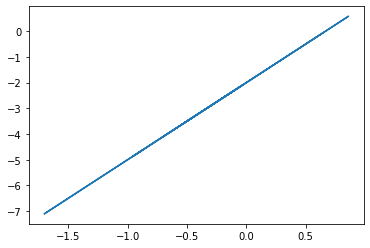

In [2]:
g = tf.random.Generator.from_seed(500)
X = g.normal(shape=(10,))

Y = 3 * (X) - 2
plt.plot(X, Y)

In [3]:
def call_mse(X, Y, a, b):
    Y_pred = a * X + b
    squared_error = (Y_pred - Y) ** 2
    mean_squared_error = tf.reduce_mean(squared_error)
    
    return mean_squared_error

In [4]:
a = tf.Variable(0.0)
b = tf.Variable(0.0)

# num of training
EPOCHS = 200

for epoch in range(1, EPOCHS + 1):
    # By default, the resources held by a GradientTape are released as soon as GradientTape.gradient() method is called. 
    # To compute multiple gradients over the same computation, create a persistent gradient tape. 
    # This allows multiple calls to the gradient() method as resources are released when the tape object is garbage collected.
    with tf.GradientTape() as tape:
        # only record below calculation
        # use 'with' to scope record range
        mse = call_mse(X, Y, a, b)
    grad = tape.gradient(mse, {'a': a, 'b': b})
    d_a, d_b = grad['a'], grad['b']
    
    a.assign_sub(d_a * 0.05)
    b.assign_sub(d_b * 0.05)
    
    if epoch % 20 == 0:
        print('EPOCH %d - MSE %.4f -- a: %.2f, b: %.2f' %(epoch, mse, a, b))

EPOCH 20 - MSE 0.2057 -- a: 2.44, b: -2.14
EPOCH 40 - MSE 0.0238 -- a: 2.81, b: -2.12
EPOCH 60 - MSE 0.0042 -- a: 2.92, b: -2.06
EPOCH 80 - MSE 0.0008 -- a: 2.97, b: -2.02
EPOCH 100 - MSE 0.0001 -- a: 2.99, b: -2.01
EPOCH 120 - MSE 0.0000 -- a: 2.99, b: -2.00
EPOCH 140 - MSE 0.0000 -- a: 3.00, b: -2.00
EPOCH 160 - MSE 0.0000 -- a: 3.00, b: -2.00
EPOCH 180 - MSE 0.0000 -- a: 3.00, b: -2.00
EPOCH 200 - MSE 0.0000 -- a: 3.00, b: -2.00
